# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

<u>**Explaintion of the model is solved**</u>

**Parameterization:** To begin we definine the parameters such as utility functions, initial endowments, and numerical values $ \alpha $, $ \beta $, $\omega_1^A$, $\omega_2^A$ and $N$.

**Utility Functions:** The utility functions for both consumers are defined. These functions represent the preferences of each consumer over the two goods.

**Allocation Grid:** A grid of possible allocations for the first consumer ($ x_1^A $ and $ x_2^A $) is created using `np.linspace()`. This grid represents all possible combinations of goods that can be allocated to the first consumer within the unit interval [0, 1].

**Valid Combinations:** For each combination of $ x_1^A $ and $ x_2^A $ in the grid, the corresponding allocations to the second consumer ($ x_1^B $ and $ x_2^B $) are calculated. If the allocations satisfy the given conditions (both consumers are at least as well off as they were with their initial endowments), they are considered valid and added to the list of valid allocations.

**Plotting:** The valid allocations are plotted in the Edgeworth box using `plt.plot()`.

<u>**Explation of the Edgeworth box**</u>

The Edgeworth box in this first question represents the possible combinations of goods $x_1$ and $x_2$ that can be allocated between two consumers, represtened as Consumer $A$ and Consumer $B$. Each axis of the box represents the quantity of $x_1$ and $x_2$.

In the plot each point corresponds to a combination of $x_1^A$ and $x_2^A$, representing the allocation of goods to Consumer $A$. The set of points in the plot illustrates the possible allocations that satisfy the conditions specified in the problem, which are:

1. Both consumers are at least as well off as they were with their initial endowments.
2. Consumer $B$'s utility is at least as high as with their initial endowment.
3. The quantities of goods allocated to both consumers add up to the total endowment of each good such that
\begin{align*}
\omega_{1}^{B} & =1-\omega_{1}^{A}\\
\omega_{2}^{B} & =1-\omega_{2}^{A}.
\end{align*}


The Edgeworth box provides a visual representation of the possible Pareto improvements relative to the initial endowments which is the egde of dotted area. Points inside the box represent allocations that are mutually beneficial to both consumers, while points on the boundary represent allocations where one consumer's utility cannot be increased without decreasing the other's utility.





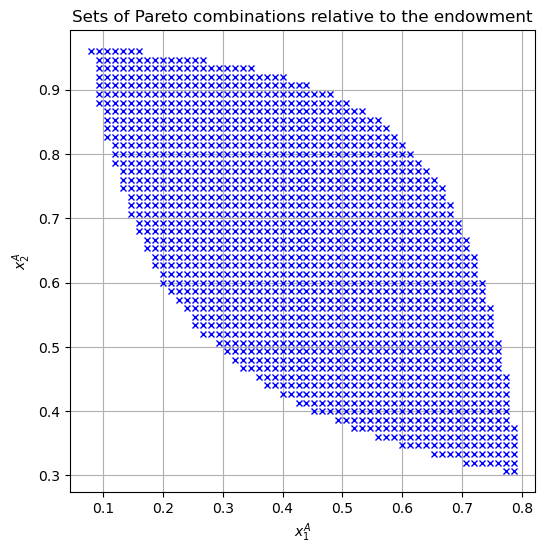

In [43]:
# Parameter values
alpha = 1/3  # Parameter for consumer A's utility function
beta = 2/3   # Parameter for consumer B's utility function
omega_A1 = 0.8  # Initial endowment of good x1 for consumer A
omega_A2 = 0.3  # Initial endowment of good x2 for consumer A
N = 75  # Number of divisions for creating grid of possible allocations
        # if we wanted we could increase this value and include more combinations 
        # in our edgeworth box.

# Utility functions
def u_A(x1_A, x2_A):
    """
    Utility function for consumer A.
    Args:
        x1_A: Quantity of good x1 allocated to consumer A.
        x2_A: Quantity of good x2 allocated to consumer A.
    Returns:
        Utility value for consumer A given the allocation.
    """
    return x1_A ** alpha * x2_A ** (1 - alpha)

def u_B(x1_B, x2_B):
    """
    Utility function for consumer B.
    Args:
        x1_B: Quantity of good x1 allocated to consumer B.
        x2_B: Quantity of good x2 allocated to consumer B.
    Returns:
        Utility value for consumer B given the allocation.
    """
    return x1_B ** beta * x2_B ** (1 - beta)

# Define the set of combinations of x1_A and x2_A
x1_A_values = np.linspace(0, 1, N+1)  # Possible values for x1_A (N+1 ensures 75 possible values)
x2_A_values = np.linspace(0, 1, N+1)  # Possible values for x2_A (N+1 ensures 75 possible values)

# Initialize lists to store valid combinations
valid_x1_A = []  # List to store valid quantities of x1_A
valid_x2_A = []  # List to store valid quantities of x2_A

# Check each combination of x1_A and x2_A
for x1_A in x1_A_values:
    for x2_A in x2_A_values:
        x1_B = 1 - x1_A  # Quantity of good x1 allocated to consumer B
        x2_B = 1 - x2_A  # Quantity of good x2 allocated to consumer B
        
        # Check if the combination is valid according to the given conditions and append if true
        if u_A(x1_A, x2_A) >= u_A(omega_A1, omega_A2) and \
           u_B(x1_B, x2_B) >= u_B(1 - omega_A1, 1 - omega_A2):
            valid_x1_A.append(x1_A)
            valid_x2_A.append(x2_A)

# Plot the sets in the Edgeworth box
plt.figure(figsize=(6, 6))
plt.plot(valid_x1_A, valid_x2_A, 'bx', markersize=4)  # Plotting valid combinations. 'b' for blue 'x' for cross
plt.xlabel('$x_1^A$')  # Labeling x-axis
plt.ylabel('$x_2^A$')  # Labeling y-axis
plt.title('Sets of Pareto combinations relative to the endowment')  # Title of the plot
plt.grid(True)  # Adding grid lines
plt.show()  # Displaying the plot

# Question 2


This code calculates the errors in the market clearing conditions $ \epsilon_1$ and $\epsilon_2$ for a given range of $ p_1 $ values and plots them against $p_1$. The code first calculate values for the variabels $x_1^A\ast$, $x_2^A\ast$, $x_1^B\ast$ and $x_2^B\ast$ with starting point in created range of $p_1$ values. It is now possible to calculate the errors ($\epsilon_1$ and $\epsilon_2$). The error values are now plotted over each values of $p_1$ which is seen in the plot. The intersection as seen must be the market clearing where the error also equals zero.

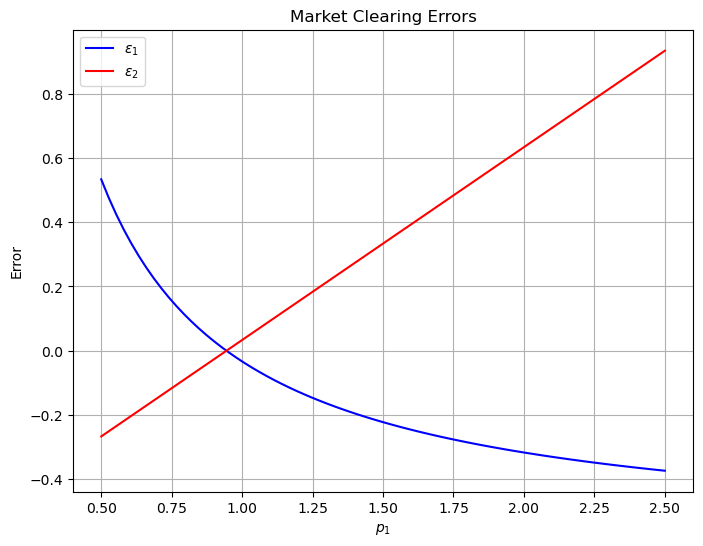

In [47]:
# Function to calculate error in market clearing conditions
def market_clearing_error(p1):
    errors = []
    for p in p1:
        # Using necessary information giving in the start of the projekt  
        # Calculate allocations for consumer A 
        x1_A_star = alpha * (p * omega_A1 + omega_A2) / p
        x2_A_star = (1 - alpha) * (p * omega_A1 + omega_A2) / 1
        # Calculate allocations for consumer B
        x1_B_star = beta * (p * (1 - omega_A1) + (1 - omega_A2)) / p
        x2_B_star = (1 - beta) * (p * (1 - omega_A1) + (1 - omega_A2)) / 1
        # Calculate errors by equations giving in the question
        error1 = x1_A_star - omega_A1 + x1_B_star - (1 - omega_A1)
        error2 = x2_A_star - omega_A2 + x2_B_star - (1 - omega_A2)
        # Append the errors to the before empty array 'errors'
        errors.append((error1, error2))
    return errors

# Range of p1 values
p1_values = np.linspace(0.5, 2.5, N+1)

# Calculate errors for the range of p1 values
errors = market_clearing_error(p1_values)

# Plot errors
plt.figure(figsize=(8, 6))
plt.plot(p1_values, [error[0] for error in errors], label='$\epsilon_1$', color='blue')
plt.plot(p1_values, [error[1] for error in errors], label='$\epsilon_2$', color='red')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Errors')
plt.legend()
plt.grid(True)
plt.show()

# Question 3

To find the intersection on the above graph we will use np.isclose which is a function from NumPy that here see if the sum of x1_A_star + x1_B_star is close to 1 and the same for x2_A_star + x2_B_star. If this is true it return the price ($p_1$) where the values are close to 1. Hereby we find the market clearing price.

In [51]:
# Function to calculate market clearing price
def market_clearing_price():
    # Solve market clearing conditions for p1 = p* with a interval of 1000
    for p1 in np.linspace(0.5, 2.5, 1000):
        # Calculate allocations for consumer A
        x1_A_star = alpha * (p1 * omega_A1 + omega_A2) / p1
        x2_A_star = (1 - alpha) * (p1 * omega_A1 + omega_A2) / 1
        # Calculate allocations for consumer B
        x1_B_star = beta * (p1 * (1 - omega_A1) + (1 - omega_A2)) / p1
        x2_B_star = (1 - beta) * (p1 * (1 - omega_A1) + (1 - omega_A2)) / 1
        # Check if market clears that is if x1_A_star + x1_B_star is close to 1 and the same
        # for x2_A_star + x2_B_star with the implemting of Walras' law
        if np.isclose(x1_A_star + x1_B_star, 1) and np.isclose(x2_A_star + x2_B_star, 1):
            return p1  # Return the market clearing price when found

# Calculate market clearing price and set as variabel name p_star
p_star = market_clearing_price()

#print p_star if found else write that p_star not found
if p_star is not None:
    print("The market clearing price will be:", p_star)
else:
    print("No market clearing price found within the given range of p1 values.")

The market clearing price will be: 0.9444444444444444


# Question 4


explain code

In [52]:
#code

ADD CONCISE CONLUSION.